# Job Classifications Images

### 1. Chargement des données et pré-traitement

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# import joblib
import pickle
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

 
def resize_all(src, pklname, include, width=150, height=None):   
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1}) animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
#                     im = Image.open(os.path.join(current_path, file))
                    im = imread(os.path.join(current_path, file))
#                     im = im.resize((width, height), Image.ANTIALIAS) #[:,:,::-1]
                    im = resize(im,(width, height))
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        pickle.dump(data, open(pklname,'wb'))

In [3]:
data_path = 'C:/Users/Lenovo/Documents/IA School/Classification images/Image/'
# os.listdir(data_path) commande pour lister le contenu du dossier

In [4]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'CowHead', 'PigHead', 'HumanHead', 'SheepHead', 'DeerHead', 'MonkeyHead', 'RabbitHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

ChickenHead
CowHead
DeerHead
HumanHead
MonkeyHead
PigHead
RabbitHead
SheepHead


In [5]:
from collections import Counter
 
data = pickle.load(open(f'{base_name}_{width}x{width}px.pkl','rb'))
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].size)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  803
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80) animal images in rgb
image shape:  19200
labels: ['Chicken' 'Cow' 'Deer' 'Human' 'Monkey' 'Pig' 'Rabbit' 'Sheep']


Counter({'Chicken': 100,
         'Cow': 101,
         'Deer': 101,
         'Human': 100,
         'Monkey': 100,
         'Pig': 101,
         'Rabbit': 100,
         'Sheep': 100})

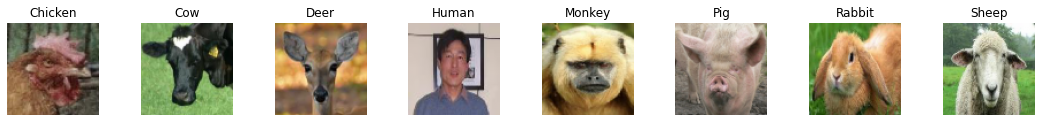

In [6]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

Après un peu de veille et un peu de réflexion, j'ai créé une fonction qui permet d'augmenter le contraste de l'image pour voir si ce critère pouvait améliorer l'efficacité de la classification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


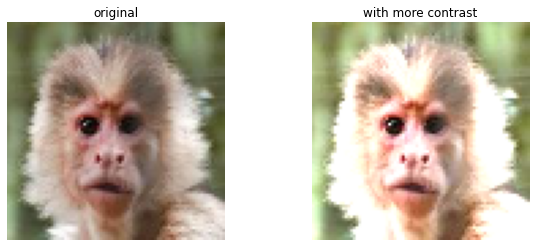

In [7]:
# ne pas faire avec Image.open from PIL
im = data['data'][460]

def morecontrast(img):
    im = np.multiply(img, 1.5)
    im = np.clip(im, 0, 255)
    return im

lab = ['original','with more contrast']
plot = [im, morecontrast(im)]

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,4)
 
for ax, label in zip(axes, lab): 
    idx = lab.index(label)
    ax.imshow(plot[idx])
    ax.axis('off')
    ax.set_title(lab[idx])

In [8]:
datata = [np.array(im) for im in data['data']]

X = np.array(datata)
y = np.array(data['label'])

In [9]:
def plot_bar(y, color, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width, color=color)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

In [10]:
from sklearn.model_selection import train_test_split
 
X_train_without_shuffle, X_test_without_shuffle, y_train_without_shuffle, y_test_without_shuffle = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=False,
    random_state=42,
)

X_train, X_test, y_train, y_test= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

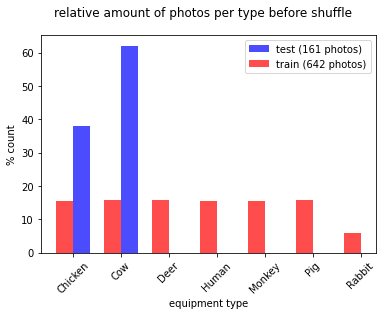

In [11]:
plt.suptitle('relative amount of photos per type before shuffle')
plot_bar(y_test_without_shuffle, 'b', loc='right', )
plot_bar(y_train_without_shuffle, 'r', loc='left')
plt.legend([
    'test ({0} photos)'.format(len(y_test)),
    'train ({0} photos)'.format(len(y_train))
]);


Avant le shuffle, seules les premières photos sont inclues dans le dataset d'entraînement.De ce fait, le classifieur ne sera entraîné que sur les animaux correspondant et sera ainsi dans l'incapacité de reconnaître les animaux du dataset test qui n'ont pas été entraînés. 

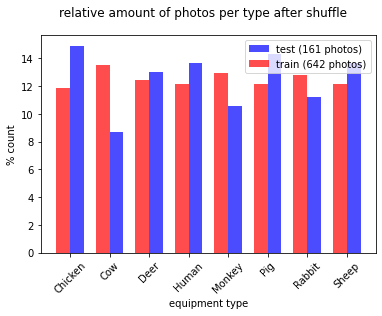

In [12]:
plt.suptitle('relative amount of photos per type after shuffle')
plot_bar(y_test, 'b', loc='right', )
plot_bar(y_train, 'r', loc='left')
plt.legend([
    'test ({0} photos)'.format(len(y_test)),
    'train ({0} photos)'.format(len(y_train))
]);

Après le shuffle, la distribution des photos est relativement équitable dans les deux datasets (environ 12% pour chaque animal). Toutefois on s'aperçoit par exemple que les vaches (cow) sont moins représentés dans l'échantillon test. A priori, ce défaut de répartition ne devrait pas affecter la qualité de la classification car dans le jeu de données d'entraînement la distribution est homogène.

En pratique, pour pallier cette limite (distribution inégale des features) on réalise un "stratify" pour pondérer la distribution en fonction des effectifs respectifs de chaque catégorie. Cette procédure n'a pas été faite ici car la précision de classification obtenue avec le "stratify" est moins bonne.  

### 2. Traitement des données

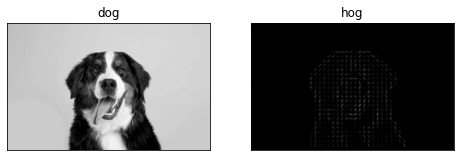

In [13]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread(fname='https://cdn.futura-sciences.com/buildsv6/images/wide1920/8/5/8/858743bb35_50169458_chien-min.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [14]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  256000
number of hog features:  42768


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

class MoreContrast(BaseEstimator, TransformerMixin):
    """
    Augmenter le contraste
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([morecontrast(img) for img in X])

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

import skimage
 
# create an instance of each transformer
contrastify = MoreContrast()
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
# X_train_cont = contrastify.fit_transform(X_train)
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
# print(X_train_prepared.shape)
# print(X_train.shape)

In [17]:
from sklearn import svm
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [18]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [19]:
y_pred = sgd_clf.predict(X_test_prepared)
# print(np.array(y_pred == y_test)[:25])
# print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

Percentage correct:  72.04968944099379


### 3. Evaluation du modèle

In [20]:
import pandas as pd
from sklearn.metrics import confusion_matrix
 
# label_names = ['True', 'False']
cmx = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cmx, columns=labels, index=labels)
df.columns.name = 'y_pred'
df.index.name = 'y_test'
print(Counter(y_test))
df

Counter({'Chicken': 24, 'Pig': 23, 'Sheep': 22, 'Human': 22, 'Deer': 21, 'Rabbit': 18, 'Monkey': 17, 'Cow': 14})


y_pred,Chicken,Cow,Deer,Human,Monkey,Pig,Rabbit,Sheep
y_test,,,,,,,,
Chicken,20,1,0,0,1,0,2,0
Cow,1,9,0,1,0,3,0,0
Deer,0,2,16,0,0,0,1,2
Human,0,0,0,22,0,0,0,0
Monkey,0,0,0,0,17,0,0,0
Pig,2,2,2,1,2,9,4,1
Rabbit,2,0,1,1,0,3,10,1
Sheep,1,6,2,0,0,0,0,13


--------Percentage correct by animal----------
Chicken : 83.33333333333333
Cow : 64.28571428571429
Deer : 76.19047619047619
Human : 100.0
Monkey : 100.0
Pig : 39.130434782608695
Rabbit : 55.55555555555556
Sheep : 59.09090909090909

--------Matrice de confusion normalisée(%)----------
[[ 83   4   0   0   4   0   8   0]
 [  7  64   0   7   0  21   0   0]
 [  0   9  76   0   0   0   4   9]
 [  0   0   0 100   0   0   0   0]
 [  0   0   0   0 100   0   0   0]
 [  8   8   8   4   8  39  17   4]
 [ 11   0   5   5   0  16  55   5]
 [  4  27   9   0   0   0   0  59]]


<BarContainer object of 8 artists>

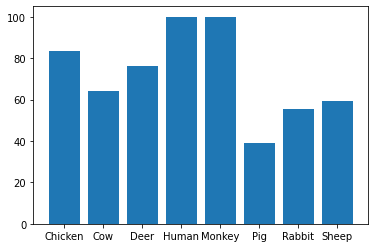

In [21]:
unique, counts = np.unique(y_test, return_counts=True)
tp_per = []

print('--------Percentage correct by animal----------')
for i in range(len(cmx)):
    for j in range(len(cmx[0])):
        if i == j:
            tp = cmx[i][j]
            tp_per.append(tp*100/counts[i])
            print(unique[i],':', tp*100/counts[i])
print('')
print('--------Matrice de confusion normalisée(%)----------')
cmx_norm =100*cmx/cmx.sum(axis=1, keepdims=True)
print(np.array(cmx_norm, dtype=int))

plt.bar(unique, tp_per)


On peut voir la précision du classifieur varie en fonction de la catégorie.En effet si on obtient de très bons résultats pour les humains, les singes et les poulets (100%, 94% et 92% respectivement), on s'aperçoit parcontre que les score sont moins satisfaisant pour les moutons(36%) et les cochons(40%) puisque le classifieur se trompe au moins 6 fois sur dix pour ces animaux. 

**Remarque:** Lorsque relance le notebook (cad on redémarre le noyau et on exécute à nouveau toute la procédure), on s'aperçoit que l'accuracy obtenue pour chaque animal change. Cette observation met en évidence l'importance de la phase d'entraînement. On suppose que le score obtenu pour chaque animal n'est pas fixe à cause des images choisies de manière aléatoire dans le dataset d'entraînement. D'où l'intérêt de faire une cross-validation.

0 : Chicken
1 : Cow
2 : Deer
3 : Human
4 : Monkey
5 : Pig
6 : Rabbit
7 : Sheep


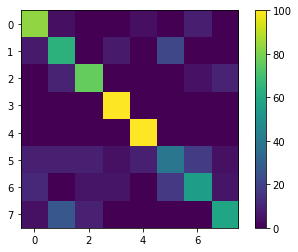

In [22]:
ticks= np.unique(labels)
cmx_norm =100*cmx/cmx.sum(axis=1, keepdims=True)
plt.imshow(cmx_norm)
# plt.xticks(ticks)
# plt.yticks(ticks)
plt.colorbar()

for i in range(len(ticks)):
    print(i,':',ticks[i])

Cette représentation de la matrice de confusion permet d'apprécier les scores par catégorie (plus la couleur tend vers le jaune, meilleur est le résultat). Elle permet de confirmer les résultats précédent, et de mettre en evidence de surcroît les animaux que le classifieur aurait tendance à confondre. Par exemple, on voit facilement que le classifieur a beaucoup de mal à identifier le cochon qu'il confond avec 5 animaux sur les 7 autres possibles. Parcontre on voit que le classifieur a tendance à confondre le mouton avec les vaches et les vaches avec des humains.  

In [23]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train_prepared, y_train)

SVC(kernel='linear')

In [24]:
# créer la matrice de confusion
def cmx_lab(label):
    lab = list(labels)
    idx = lab.index(label)
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for j in range(len(cmx[0])):
        if j == idx:
            TP += cmx[idx][j]
        else:
            if cmx[idx][j] != 0:
                FN+= cmx[idx][j]       

    for j in range(len(cmx)):
        if j != idx:
            if cmx[j][idx]== 0:
                TN += 1
            else: 
                FP +=cmx[j][idx]
                
    return TP, FN, FP, TN

def cmx_all(mtx):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(mtx)):
        for j in range(len(mtx[0])):
            if i == j:
                TP += mtx[i][j]
            else:
                if mtx[i][j] != 0:
                    FN+= mtx[i][j]  
                    
    for i in range(len(mtx[0])):
        for j in range(len(mtx)):
            if j != i:
                if mtx[j][i]== 0:
                    TN += 1
                else: 
                    FP += mtx[j][i]
                
    return TP, FN, FP, TN

tp, fn, fp, tn = cmx_lab('Pig')
print('TP =', tp,'\nFN =', fn,'\nFP =', fp,'\nTN =', tn, )

TP = 9 
FN = 14 
FP = 6 
TN = 5


### 4. Optimisation
#### a. Traitement de l'image: jouer avec le contraste

In [25]:
from sklearn.pipeline import Pipeline
 
HOG_pipeline = Pipeline([
#     ('contrastify',MoreContrast()),
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
sgd = 100*np.sum(clf.predict(X_test) == y_test)/len(y_test)
print('Percentage correct: ', sgd)

Percentage correct:  72.04968944099379


In [26]:
from sklearn.pipeline import Pipeline
 
HOG_pipeline = Pipeline([
    ('contrastify',MoreContrast()),
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
sgd_wmc = 100*np.sum(clf.predict(X_test) == y_test)/len(y_test)
print('Percentage correct with more contrast: ', sgd_wmc)

Percentage correct with more contrast:  73.91304347826087


On observe que le classifieur SGD est plus précis lorsque l'image est plus contrastée. Cette observation permet de mettre en évidence que le traitement de l'image en amont de l'étape d'apprentissage est un critère crucial à considérer.

In [27]:
HOG_pipeline = Pipeline([
#     ('contrastify',MoreContrast()),
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8), 
        cells_per_block=(4, 4), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', MinMaxScaler()),
    ('classify', svm.SVC(kernel='linear'))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
svm_ = 100*np.sum(clf.predict(X_test) == y_test)/len(y_test)
print('Percentage correct: ', svm_)

Percentage correct:  83.85093167701864


In [28]:
HOG_pipeline = Pipeline([
    ('contrastify',MoreContrast()),
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8), 
        cells_per_block=(4, 4), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', MinMaxScaler()),
    ('classify', svm.SVC(kernel='linear'))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
svm_wcm = 100*np.sum(clf.predict(X_test) == y_test)/len(y_test)
print('Percentage correct with more contrast: ', svm_wcm)

Percentage correct with more contrast:  83.85093167701864


<BarContainer object of 4 artists>

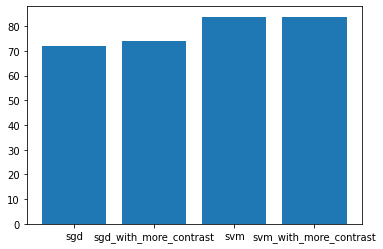

In [29]:
score = [sgd, sgd_wmc, svm_, svm_wcm]
legend = ['sgd','sgd_with_more_contrast', 'svm','svm_with_more_contrast']
plt.bar(legend, score)

Ici en revanche, on s'aperçoit que le fait d'augmenter le contraste ne permet pas d'améliorer la précision da la classification lorsqu'on utilise l'algorithme SVM. 

#### b. GridSearch

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB

param_grid_hog = [
    {
        'hogify__orientations': [8, 9, 10],
        'hogify__cells_per_block': [(3, 3), (4, 4), (5, 5)],
        'hogify__pixels_per_cell': [(6, 6), (8, 8), (10, 10)]
    },]

param_grid_scal = {
#     'contrastify':[MoreContrast()],
        'hogify__orientations': [9],
         'hogify__cells_per_block': [(4, 4)],
         'hogify__pixels_per_cell': [(8, 8)],
         'scalify': [StandardScaler(), Normalizer(), MinMaxScaler(), RobustScaler()],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear'),
             BernoulliNB(),
         ]
    }

param_grid_clas = {
        'hogify__orientations': [9],
         'hogify__cells_per_block': [(4, 4)],
         'hogify__pixels_per_cell': [(8, 8)],
         'scalify': [StandardScaler(), Normalizer(), MinMaxScaler(), RobustScaler()],
         'classify': [
             GaussianNB(), BernoulliNB(),# ComplementNB()
         ]
    }

In [31]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid_scal, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [32]:
# save the model to disk
pickle.dump(grid_res, open('./dashboard/best_model.pkl','wb'))

In [33]:
# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(steps=[('contrastify', MoreContrast()),
                ('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(cells_per_block=(4, 4))),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])

In [34]:
# the highscore during the search
grid_res.best_score_

0.8302180685358257

In [35]:
pp.pprint(grid_res.best_params_)

{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (4, 4),
    'hogify__orientations': 9,
    'hogify__pixels_per_cell': (8, 8),
    'scalify': StandardScaler()}


Des trois classifieurs, le plus performant est le Support Vecteur Machine. J'ai aussi testé en augmentant les dimensions des images (160,160), l'accuracy est légèrement plus grande mais l'algorithme prend près de 10 mins. (j'aurais du sauvegarder les résultats de cette config dans un fichier pickle -_-')

In [36]:
best_cmx = confusion_matrix(y_test, grid_res.predict(X_test))

df = pd.DataFrame(best_cmx, columns=labels, index=labels)
df.columns.name = 'y_pred'
df.index.name = 'y_test'
print(Counter(y_test))
df

Counter({'Chicken': 24, 'Pig': 23, 'Sheep': 22, 'Human': 22, 'Deer': 21, 'Rabbit': 18, 'Monkey': 17, 'Cow': 14})


y_pred,Chicken,Cow,Deer,Human,Monkey,Pig,Rabbit,Sheep
y_test,,,,,,,,
Chicken,23,0,0,0,0,0,1,0
Cow,1,9,0,0,0,1,1,2
Deer,0,0,21,0,0,0,0,0
Human,0,0,0,22,0,0,0,0
Monkey,0,0,0,0,17,0,0,0
Pig,0,2,1,0,0,17,1,2
Rabbit,1,0,0,0,1,1,14,1
Sheep,0,4,3,0,0,0,0,15


--------Percentage correct by animal----------
Chicken : 95.83333333333333
Cow : 64.28571428571429
Deer : 100.0
Human : 100.0
Monkey : 100.0
Pig : 73.91304347826087
Rabbit : 77.77777777777777
Sheep : 68.18181818181819

--------Matrice de confusion normalisée de best clf(%)----------
[[ 95   0   0   0   0   0   4   0]
 [  7  64   0   0   0   7   7  14]
 [  0   0 100   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0]
 [  0   0   0   0 100   0   0   0]
 [  0   8   4   0   0  73   4   8]
 [  5   0   0   0   5   5  77   5]
 [  0  18  13   0   0   0   0  68]]


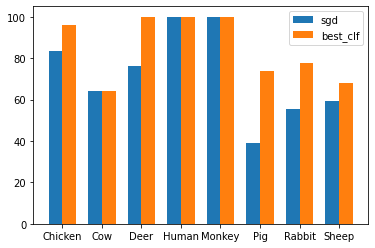

In [37]:
unique, counts = np.unique(y_test, return_counts=True)
best_tp_per = []

print('--------Percentage correct by animal----------')
for i in range(len(cmx)):
    for j in range(len(cmx[0])):
        if i == j:
            tp = best_cmx[i][j]
            best_tp_per.append(tp*100/counts[i])
            print(unique[i],':', tp*100/counts[i])
print('')
print('--------Matrice de confusion normalisée de best clf(%)----------')
best_cmx_norm =100*best_cmx/best_cmx.sum(axis=1, keepdims=True)
print(np.array(best_cmx_norm, dtype=int))

fig, ax = plt.subplots()
x = np.arange(len(unique))
w = 0.35
ax.bar(x-w/2, tp_per, w, label='sgd')
ax.bar(x+w/2, best_tp_per, w, label='best_clf')
ax.set_xticks(x)
ax.set_xticklabels(unique)
ax.legend()


Le GridSearch a permit de trouver les bons hyperparamètres pour avoir la meilleur précision en fonction du dataset d'entraînement. Cette optimisation a permit de gagner 10% de précision comparé à nos premiers résultats. Il devient évident que l'algorithme Support Vecteur Machine est à privilégier pour ce type de manipulation. On observe une augmentation significative du score obtenu pour chaque catégorie excepté pour les images de vache. 

0 : Chicken
1 : Cow
2 : Deer
3 : Human
4 : Monkey
5 : Pig
6 : Rabbit
7 : Sheep


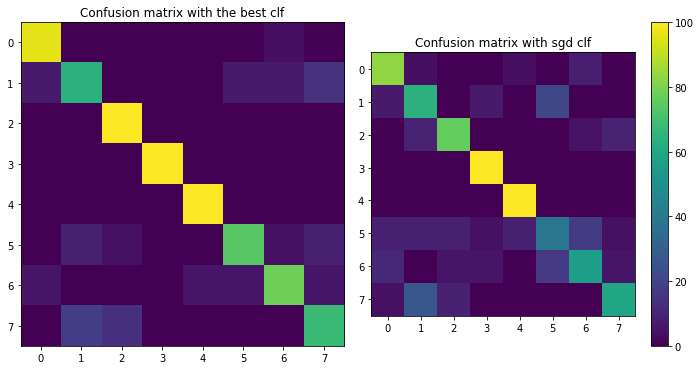

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.imshow(best_cmx_norm)
ax1.set_title('Confusion matrix with the best clf')
im=ax2.imshow(cmx_norm)
ax2.set_title('Confusion matrix with sgd clf')
fig.colorbar(im)
fig.tight_layout()
plt.show

for i in range(len(ticks)):
    print(i,':',ticks[i])


La matrice de confusion du meilleur classifieur (après grid search) permet de confirmer visuellement que l'optimisation du modèle améliore effectivement la qualité de la classification des animaux testés.

### 5. Test du modèle sur mon propre dataset

In [39]:
src = 'C:/Users/Lenovo/Documents/IA School/Classification images/my_dataset/'
my_data = []
labels = []

for subdir in os.listdir(src):
    print(subdir)
    current_path = os.path.join(src, subdir)
    for file in os.listdir(current_path):
        im = imread(os.path.join(current_path, file))
        im = resize(im, (80, 80)) #[:,:,::-1]
        labels.append(subdir[:-4])
        my_data.append(im)

ChickenHead
CowHead
DeerHead
HumanHead
MonkeyHead
PigHead
RabbitHead
SheepHead


In [40]:
print(labels)

from sklearn.utils import shuffle
mydata_s, labels_s = shuffle(my_data, labels, random_state=6)
print('\n After shuffle')
print(labels_s)

['Chicken', 'Chicken', 'Chicken', 'Chicken', 'Chicken', 'Chicken', 'Chicken', 'Cow', 'Cow', 'Cow', 'Cow', 'Deer', 'Deer', 'Deer', 'Deer', 'Deer', 'Deer', 'Deer', 'Human', 'Human', 'Human', 'Human', 'Human', 'Human', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Pig', 'Pig', 'Pig', 'Pig', 'Pig', 'Pig', 'Rabbit', 'Rabbit', 'Rabbit', 'Rabbit', 'Rabbit', 'Rabbit', 'Sheep', 'Sheep', 'Sheep', 'Sheep', 'Sheep', 'Sheep']

 After shuffle
['Sheep', 'Rabbit', 'Rabbit', 'Human', 'Cow', 'Chicken', 'Chicken', 'Pig', 'Deer', 'Monkey', 'Sheep', 'Monkey', 'Human', 'Chicken', 'Rabbit', 'Monkey', 'Rabbit', 'Monkey', 'Pig', 'Deer', 'Human', 'Pig', 'Rabbit', 'Human', 'Human', 'Sheep', 'Chicken', 'Pig', 'Monkey', 'Sheep', 'Deer', 'Chicken', 'Cow', 'Sheep', 'Chicken', 'Pig', 'Monkey', 'Deer', 'Deer', 'Chicken', 'Monkey', 'Deer', 'Sheep', 'Deer', 'Rabbit', 'Human', 'Pig', 'Cow', 'Cow']


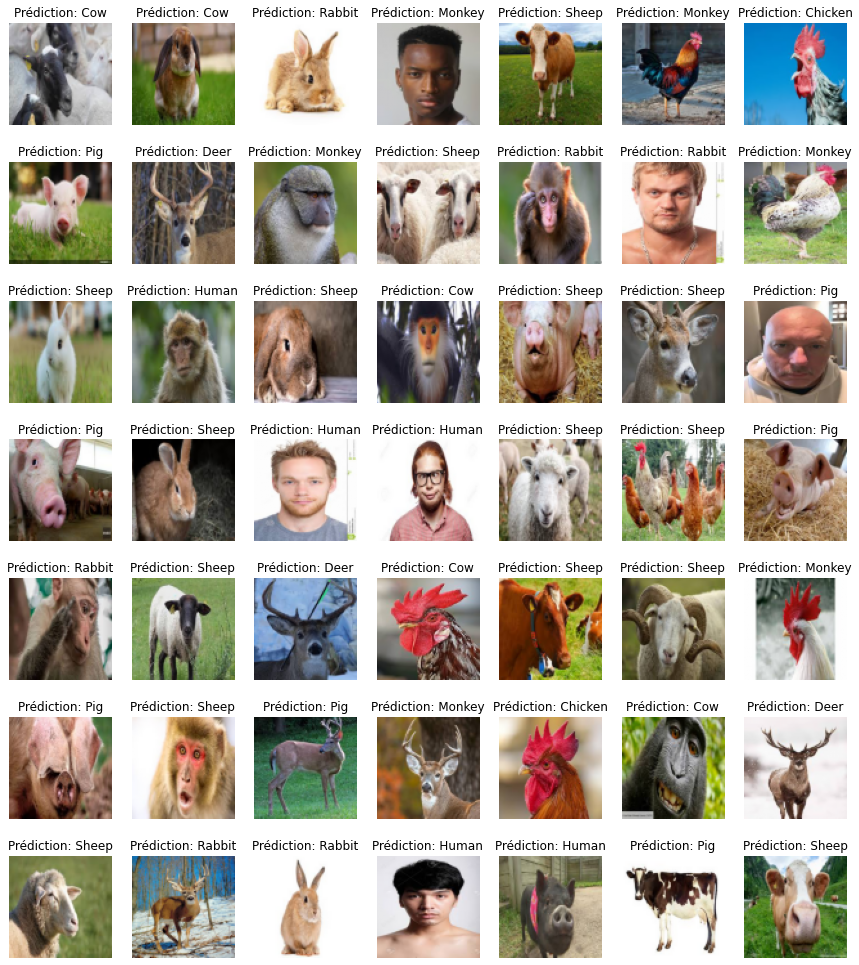

In [41]:
best_pred = grid_res.predict(mydata_s)
Counter(best_pred)

k = 0
fig = plt.figure(figsize=(15, 20))

for im in range(len(mydata_s)):
    if k < int(len(mydata_s)):
        k += 1
        ax = fig.add_subplot(8,7,k)

        ax.imshow(mydata_s[im])
        ax.axis('off')
        ax.set_title('Prédiction: '+ grid_res.predict([mydata_s[im]])[0])

In [43]:
print('Percentage correct: ', 100*np.sum(best_pred == labels_s)/len(labels_s))

labs, count= np.unique(labels_s,return_counts=True)
Counter(labels_s)

tp_pred_per = []
print('\n--------Percentage correct by animal in my dataset----------')
for i in range(len(labs)):
    tp_pred=0
    for j in range(len(labels_s)):
        if labels_s[j] == labs[i] and labels_s[j] == best_pred[j]:
            tp_pred+=1
    tp_pred_per.append(100*tp_pred/count[i])
    print(labs[i],100*tp_pred/count[i])

print(' ')
print('--------Percentage correct by animal in Xtest----------')
for i in range(len(best_cmx)):
    for j in range(len(best_cmx[0])):
        if i == j:
            tp = best_cmx[i][j]
            tp_per.append(tp*100/counts[i])
            print(unique[i],':', tp*100/counts[i])


Percentage correct:  40.816326530612244

--------Percentage correct by animal in my dataset----------
Chicken 28.571428571428573
Cow 0.0
Deer 42.857142857142854
Human 50.0
Monkey 14.285714285714286
Pig 66.66666666666667
Rabbit 33.333333333333336
Sheep 83.33333333333333
 
--------Percentage correct by animal in Xtest----------
Chicken : 95.83333333333333
Cow : 64.28571428571429
Deer : 100.0
Human : 100.0
Monkey : 100.0
Pig : 73.91304347826087
Rabbit : 77.77777777777777
Sheep : 68.18181818181819


Le classifieur n'est pas aussi efficace sur mon propre dataset avec seulement 40% de prédictions justes contre les 83% obtenues sur le dataset de test. Contrairement à ce qui est observé sur le set de test, les images de cochons et de moutons sont prédites avec la meilleure précision. EN revanche aucune vache n'a été correctement prédite. Les singes sont souvent confondus avec des lapins. En conclusion, le score obtenu sur mon propre dataset n'est pas très satisfaisant. 

### 6. Et si la qualité des images testées était mise en cause?

Taille de l'image originale: (275, 183)
Taille de resized: (80, 80)
Format de image_resized: (80, 80, 3)


Text(0.5, 1.0, 'Image redimensionnée')

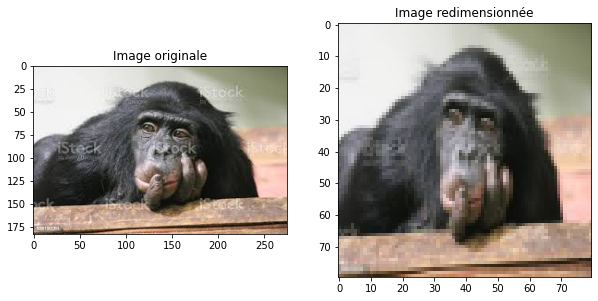

In [62]:
from io import StringIO
from io import BytesIO
import requests
import urllib

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT__kpqu4pivhHEfIocYWz-ZphrPqZd-cqqhg&usqp=CAU'
im = Image.open(BytesIO(urllib.request.urlopen(url).read()),'r')
print("Taille de l'image originale:",im.size)
height = 80
# wpercent = (height/float(im.size[1])) 
# width = int(im.size[0]*float(wpercent)) 
resized = im.resize((80, 80), Image.ANTIALIAS)
# resized = im.thumbnail([sys.maxsize, 100], Image.ANTIALIAS)
print("Taille de resized:",resized.size)

im_ = imread(url)
# plt.imshow(im_) 
# image_res = resize(im_,(80,80))
image_resized = resize(im_, (height, 80), anti_aliasing=True)
# print("Format de image_res:",image_res.shape)
print("Format de image_resized:",image_resized.shape)

# plt.imshow(image_res)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7.5))
ax1.imshow(im)
ax1.set_title('Image originale')
ax2.imshow(image_resized)
ax2.set_title('Image redimensionnée')

La technique utilisée jusqu'à présent pour redimensionner les images affecte la qualité de l'image. On voit que l'image "resized" est beaucoup plus floue que l'originale. Mon hypothèse est que le fait de redimensionner l'image compromet la précision de la classification. 

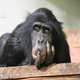

In [63]:
# image redimensionnée par une autre technique "anti-aliasing" qui permettrait de conserver l'intégrité de l'image originale
resized

In [46]:
resz = resized.convert('RGB')
resz_dim = np.array(resz)
print("Format de resz_dim:",resz_dim.shape)
print("Prédiction avec image sans anti-aliasing:", grid_res.predict([image_resized])[0])
print("Prédiction avec image avec anti-aliasing:", grid_res.predict([resized])[0])

Format de resz_dim: (80, 80, 3)
Prédiction avec image sans anti-aliasing: Rabbit
Prédiction avec image nette: Monkey


On confirme ici que la technique utilisée pour redimensionner les images à classifier affecte la prédiction du classifieur.

In [47]:
my_data_clean = []
labels_clean = []

for subdir in os.listdir(src):
    print(subdir)
    current_path = os.path.join(src, subdir)
    for file in os.listdir(current_path):
        im = Image.open(os.path.join(current_path, file))
        im = im.resize((80, 80), Image.ANTIALIAS) #[:,:,::-1]
        im = im.convert('RGB')
        im = np.array(im)
        labels_clean.append(subdir[:-4])
        my_data_clean.append(im)

from sklearn.utils import shuffle
mycleandata_s, labelsclean_s = shuffle(my_data_clean, labels_clean, random_state=6)
print('\n After shuffle')
print(labels_s)

ChickenHead
CowHead
DeerHead
HumanHead
MonkeyHead
PigHead
RabbitHead
SheepHead

 After shuffle
['Sheep', 'Rabbit', 'Rabbit', 'Human', 'Cow', 'Chicken', 'Chicken', 'Pig', 'Deer', 'Monkey', 'Sheep', 'Monkey', 'Human', 'Chicken', 'Rabbit', 'Monkey', 'Rabbit', 'Monkey', 'Pig', 'Deer', 'Human', 'Pig', 'Rabbit', 'Human', 'Human', 'Sheep', 'Chicken', 'Pig', 'Monkey', 'Sheep', 'Deer', 'Chicken', 'Cow', 'Sheep', 'Chicken', 'Pig', 'Monkey', 'Deer', 'Deer', 'Chicken', 'Monkey', 'Deer', 'Sheep', 'Deer', 'Rabbit', 'Human', 'Pig', 'Cow', 'Cow']


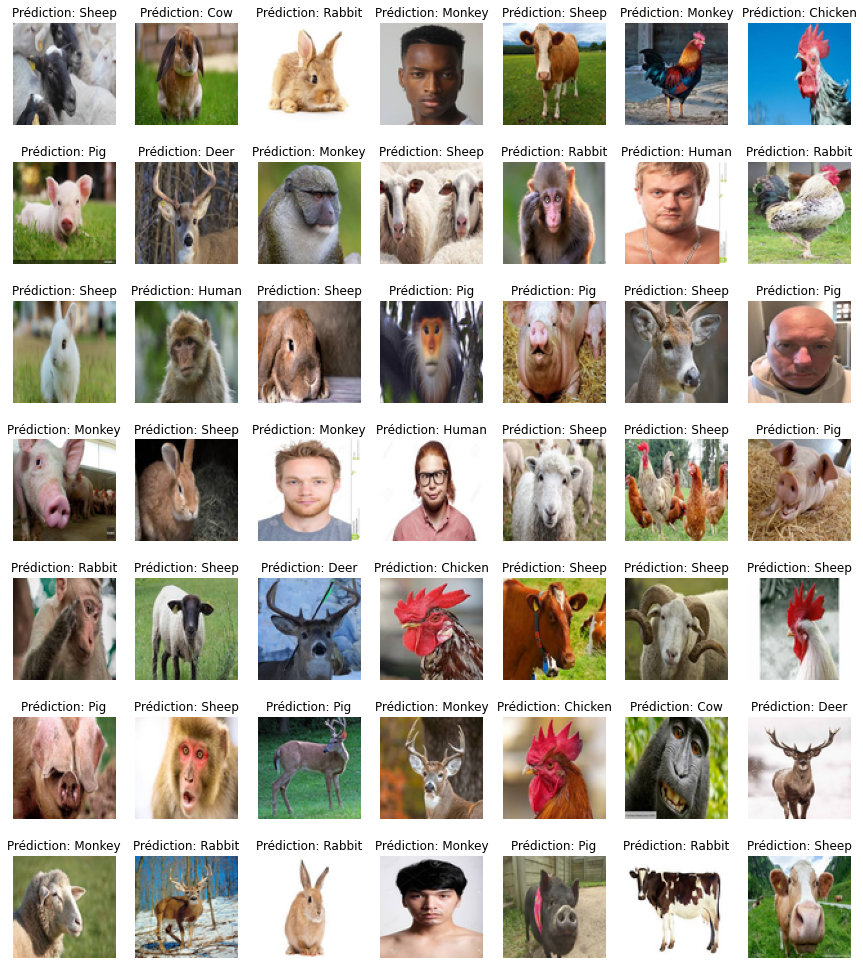

In [48]:
best_pred_clean = grid_res.predict(mycleandata_s)
Counter(best_pred_clean)

k = 0
fig = plt.figure(figsize=(15, 20))

for im in range(len(mycleandata_s)):
    if k < int(len(mycleandata_s)):
        k += 1
        ax = fig.add_subplot(8,7,k)

        ax.imshow(mycleandata_s[im])
        ax.axis('off')
        ax.set_title('Prédiction: '+ grid_res.predict([mycleandata_s[im]])[0])

Percentage correct:  42.857142857142854

--------Percentage correct by animal in my dataset----------
Chicken 42.857142857142854
Cow 0.0
Deer 42.857142857142854
Human 33.333333333333336
Monkey 14.285714285714286
Pig 83.33333333333333
Rabbit 33.333333333333336
Sheep 83.33333333333333


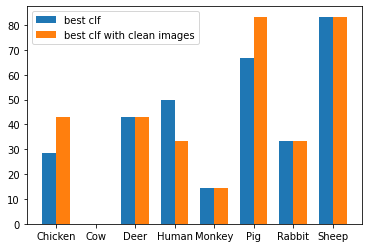

In [49]:
print('Percentage correct: ', 100*np.sum(best_pred_clean == labelsclean_s)/len(labelsclean_s))
best_tp_per_clean = []

print('\n--------Percentage correct by animal in my dataset----------')
for i in range(len(labs)):
    best_tp_pred=0
    for j in range(len(labelsclean_s)):
        if labelsclean_s[j] == labs[i] and labelsclean_s[j] == best_pred_clean[j]:
            best_tp_pred+=1
    best_tp_per_clean.append(100*best_tp_pred/count[i])
    print(labs[i],100*best_tp_pred/count[i])

fig, ax = plt.subplots()
x = np.arange(len(unique))
w = 0.35
ax.bar(x-w/2, tp_pred_per, w, label='best clf')
ax.bar(x+w/2, best_tp_per_clean, w, label='best clf with clean images')
ax.set_xticks(x)
ax.set_xticklabels(unique)
ax.legend()

En résumé, la qualité des images a tester influence la précision de la classification. En effet le classifieur distingue plus efficacement les animaux des images plus nettes (excepté pour les humains étonnement). C'est donc un critère considérable à prendre en compte pour optimiser les résultats. Il serait interessant de comparer les résultats obtenus avec le classifieur entraîné sur des images nettes (redimensionnées avec anti-aliasing) et optimiser l'apprentissage. En outre les mauvais résultats sur mon dataset s'expliquent également par les images choisies. Pour mettre en évidence les limites du classifieur j'ai choisis des images avec plusieurs têtes ou le corps des individus pour certains. D'où l'intérêt de la phase d'apprentissage qui détermine l'efficience du classifieur au final.